In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [20]:
plt.style.use('seaborn')

## Data Preparation

In [21]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


## Data Visualization

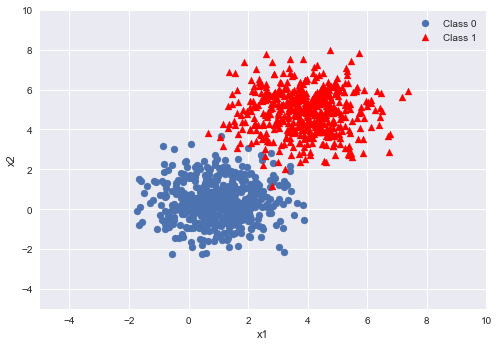

In [22]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

## Create Train and Test set

In [23]:
data = np.zeros((1000, 3))
print(data.shape)

(1000, 3)


In [24]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [25]:
np.random.shuffle(data)
print(data[:10])

[[ 0.79929424  0.4438137   0.        ]
 [ 3.66283753  6.0284      1.        ]
 [ 5.22814554  5.88627223  1.        ]
 [ 1.27017085  0.11098593  0.        ]
 [ 4.86932013  4.05506691  1.        ]
 [ 1.80770658  1.04053462  0.        ]
 [ 2.09939446 -1.01102121  0.        ]
 [ 4.65897746  5.86965266  1.        ]
 [ 1.89755195  0.4920715   0.        ]
 [-0.1932965   0.59120808  0.        ]]


In [26]:
split = int(0.8*data.shape[0])

In [27]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Function

In [31]:
def hypothesis(x, w, b):
    h = np.dot(x, w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true, x, w, b):

    m = x.shape[0]

    err = 0.0

    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)

    return -err/m

def get_grads(y_true, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0

    m = x.shape[0]

    for i in range(m):
        hx = hypothesis(x[i], w, b)

        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)

    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

def grad_desc(x, y_true, w, b, learning_rate=0.1):
    err = error(y_true, x, w, b)
    [grad_w, grad_b] = get_grads(y_true, x, w, b)

    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err, w, b

def predict(x, w, b):
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1

def get_Acc(x_tst, y_tst, w, b):
    y_pred = []

    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i], w, b)
        y_pred.append(p)

    y_pred = np.array(y_pred)
    return float((y_pred == y_tst).sum())/y_tst.shape[0]

In [32]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1], ))
b = 5*np.random.random()

In [33]:
for i in range(1000):
    l, W, b = grad_desc(X_train, Y_train, W, b, learning_rate=0.1)
    acc.append(get_Acc(X_test, Y_test, W, b))
    loss.append(l)

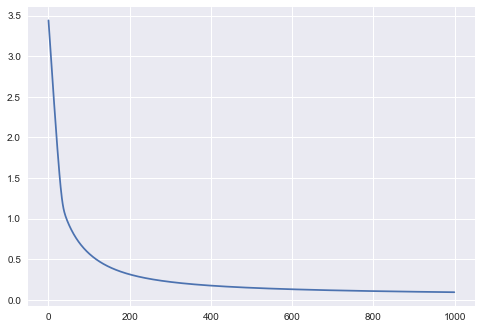

In [34]:
plt.plot(loss)
plt.ylabel = 'Negative of Log Likelihood'
plt.xlabel = 'Time'
plt.show()

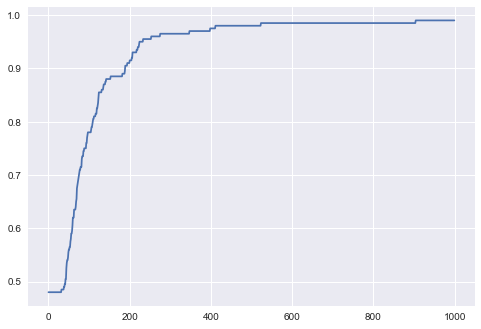

0.99


In [35]:
plt.plot(acc)
plt.show()
print(acc[-1])

## Decision Boundary

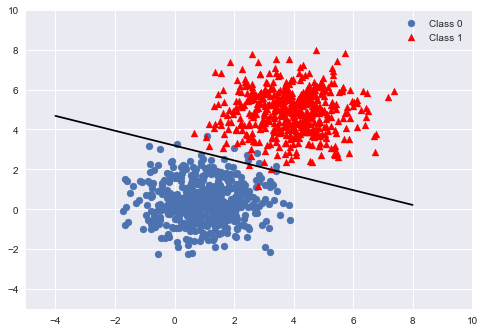

In [37]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel = 'x1'
plt.ylabel = 'x2'

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [38]:
print(W)
print(b)

[0.52960418 1.42252498]
-4.537135447673616
